In [1]:
import tensorflow as tf
tf.test.gpu_device_name()
!pip install -q keras
!git clone https://github.com/prabhunithingollapudi007/HandSignClassification.git
from glob import glob
from sklearn.model_selection import train_test_split

Cloning into 'HandSignClassification'...
remote: Enumerating objects: 556, done.
remote: Counting objects: 100% (556/556), done.
remote: Compressing objects: 100% (526/526), done.
remote: Total 556 (delta 26), reused 553 (delta 26), pack-reused 0
Receiving objects: 100% (556/556), 16.57 MiB | 30.24 MiB/s, done.
Resolving deltas: 100% (26/26), done.


In [0]:

zeros= glob('HandSignClassification/Images/rgb/train/rgb_0/*.jpg')
ones = glob('HandSignClassification/Images/rgb/train/rgb_1/*.jpg')
twos= glob('HandSignClassification/Images/rgb/train/rgb_2/*.jpg')
threes= glob('HandSignClassification/Images/rgb/train/rgb_3/*.jpg')
fours = glob('HandSignClassification/Images/rgb/train/rgb_4/*.jpg')
fives = glob('HandSignClassification/Images/rgb/train/rgb_5/*.jpg')
sixes = glob('HandSignClassification/Images/rgb/train/rgb_6/*.jpg')
sevens = glob('HandSignClassification/Images/rgb/train/rgb_7/*.jpg')
eights = glob('HandSignClassification/Images/rgb/train/rgb_8/*.jpg')
nines = glob('HandSignClassification/Images/rgb/train/rgb_9/*.jpg')

In [0]:
zeros_train, zeros_test = train_test_split(zeros, test_size=0.3)

ones_train, ones_test = train_test_split(ones, test_size=0.3)
twos_train, twos_test = train_test_split(twos, test_size=0.3)
threes_train, threes_test = train_test_split(threes, test_size=0.3)

fours_train, fours_test = train_test_split(fours, test_size=0.3)
fives_train, fives_test = train_test_split(fives, test_size=0.3)
sixes_train, sixes_test = train_test_split(sixes, test_size=0.3)

sevens_train, sevens_test = train_test_split(sevens, test_size=0.3)
eights_train, eights_test = train_test_split(eights, test_size=0.3)
nines_train, nines_test = train_test_split(nines, test_size=0.3)

In [0]:
TRAIN_DIR = 'HandSignClassification/Images/rgb/train'
TEST_DIR = 'test'

!mkdir test

!mkdir test/Zero
files = ' '.join(zeros_test)
!mv -t test/Zero $files

!mkdir test/One
files = ' '.join(ones_test)
!mv -t test/One $files

!mkdir test/Two
files = ' '.join(twos_test)
!mv -t test/Two $files

!mkdir test/Three
files = ' '.join(threes_test)
!mv -t test/Three $files

!mkdir test/Four
files = ' '.join(fours_test)
!mv -t test/Four $files

!mkdir test/Five
files = ' '.join(fives_test)
!mv -t test/Five $files

!mkdir test/Six
files = ' '.join(sixes_test)
!mv -t test/Six $files

!mkdir test/Seven
files = ' '.join(sevens_test)
!mv -t test/Seven $files

!mkdir test/Eight
files = ' '.join(eights_test)
!mv -t test/Eight $files

!mkdir test/Nine
files = ' '.join(nines_test)
!mv -t test/Nine $files

In [0]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

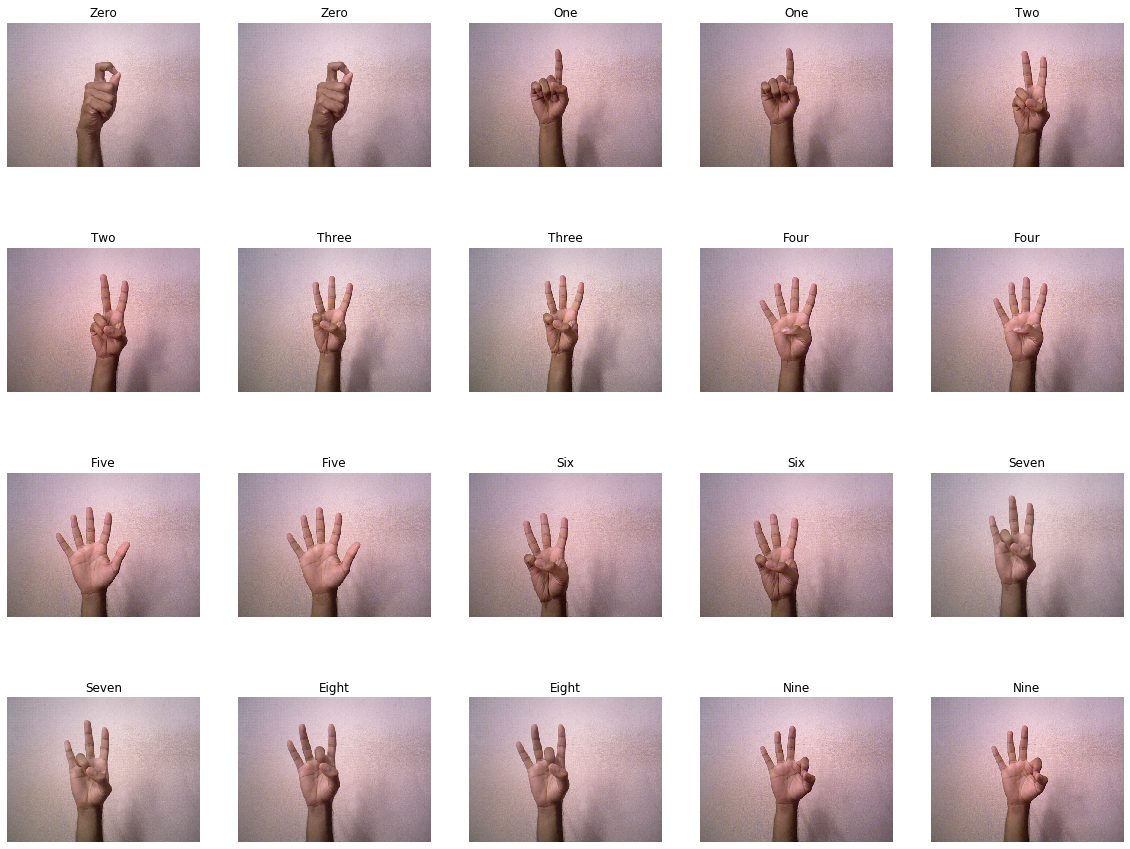

In [6]:
zeros = np.random.choice(zeros_train, 2)

ones = np.random.choice(ones_train, 2)
twos = np.random.choice(twos_train, 2)
threes = np.random.choice(threes_train, 2)

fours = np.random.choice(fours_train, 2)
fives = np.random.choice(fives_train, 2)
sixes = np.random.choice(sixes_train, 2)

sevens = np.random.choice(sevens_train, 2)
eights = np.random.choice(eights_train, 2)
nines = np.random.choice(nines_train, 2)

data = np.concatenate((zeros, ones, twos, threes, fours, fives, sixes, sevens, eights, nines))
labels = 2* ['Zero'] + 2 * ['One'] + 2 *['Two'] + 2 *['Three'] + 2 *['Four'] + 2 *['Five'] + 2 *['Six'] + 2 *['Seven'] + 2 *['Eight'] + 2 *['Nine']

N, R, C = 25, 5, 5
plt.figure(figsize=(20, 20))
for k, (src, label) in enumerate(zip(data, labels)):
    im = Image.open(src).convert('RGB')
    plt.subplot(R, C, k+1)
    plt.title(label)
    plt.imshow(np.asarray(im))
    plt.axis('off')

In [7]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 10
    
# setup model
base_model = InceptionV3(weights='imagenet', include_top=False)

x = base_model.output
x = GlobalAveragePooling2D(name='avg_pool')(x)
x = Dropout(0.4)(x)
predictions = Dense(CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
   
# transfer learning
for layer in base_model.layers:
    layer.trainable = False
      
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

Using TensorFlow backend.






87916544/87910968 [==============================] - 3s 0us/step
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [8]:
from keras.preprocessing.image import ImageDataGenerator

WIDTH = 640
HEIGHT = 480
BATCH_SIZE = 32



train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(HEIGHT, WIDTH),
		batch_size=BATCH_SIZE,
		class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(HEIGHT, WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical')

Found 100 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [15]:
EPOCHS = 3
BATCH_SIZE = 32
STEPS_PER_EPOCH = 320
VALIDATION_STEPS = 64

MODEL_FILE = 'classifier.model'

history = model.fit_generator(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS)
  
model.save(MODEL_FILE)

Epoch 1/3
320/320 [==============================] - 194s 605ms/step - loss: 0.3091 - acc: 0.9807 - val_loss: 3.4091 - val_acc: 0.1000
Epoch 2/3
320/320 [==============================] - 188s 587ms/step - loss: 0.1500 - acc: 0.9852 - val_loss: 3.7723 - val_acc: 0.1400
Epoch 3/3
320/320 [==============================] - 186s 583ms/step - loss: 0.1015 - acc: 0.9877 - val_loss: 3.8429 - val_acc: 0.1200


In [0]:
import numpy as np
import seaborn as sns
from keras.models import load_model
from sklearn.metrics import confusion_matrix

[3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 3, 4, 2, 2, 2, 3, 4, 4, 4, 5, 4, 4, 4, 5, 4, 4, 4, 4, 4, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 4, 3, 4, 2, 4, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3]


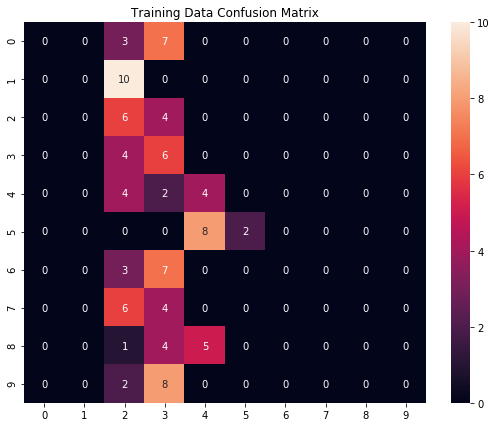

In [17]:
def predict(model, img):
    img = Image.open(img)
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return np.argmax(preds[0])

zeros= glob('HandSignClassification/Images/rgb/train/rgb_0/*.jpg')
ones = glob('HandSignClassification/Images/rgb/train/rgb_1/*.jpg')
twos= glob('HandSignClassification/Images/rgb/train/rgb_2/*.jpg')
threes= glob('HandSignClassification/Images/rgb/train/rgb_3/*.jpg')
fours = glob('HandSignClassification/Images/rgb/train/rgb_4/*.jpg')
fives = glob('HandSignClassification/Images/rgb/train/rgb_5/*.jpg')
sixes = glob('HandSignClassification/Images/rgb/train/rgb_6/*.jpg')
sevens = glob('HandSignClassification/Images/rgb/train/rgb_7/*.jpg')
eights = glob('HandSignClassification/Images/rgb/train/rgb_8/*.jpg')
nines = glob('HandSignClassification/Images/rgb/train/rgb_9/*.jpg')

my_pred = []
model = load_model(MODEL_FILE)

train_folders = [zeros, ones, twos, threes, fours
                 , fives, sixes, sevens, eights, nines]

samples = 10

for folder in train_folders:
  for temp_img in folder:
    my_pred.append(predict(model, temp_img))
print(my_pred)


my_true_values = []
for i in range(0, 10):
  for j in range(samples):
    my_true_values.append(i)

cm = confusion_matrix(my_true_values, my_pred)
plt.figure(figsize=(9, 7))
plt.title("Training Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

[3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 4, 2, 4, 4, 2, 2, 4, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 3, 3, 2, 3, 4, 2, 3, 2, 3, 3]


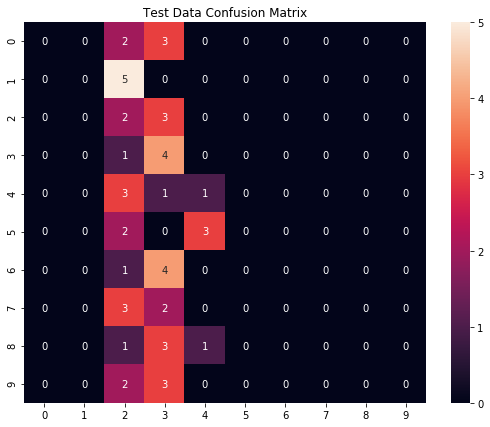

In [18]:
def predict(model, img):
    img = Image.open(img)
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return np.argmax(preds[0])

zeros= glob('test/Zero/*.jpg')
ones = glob('test/One/*.jpg')
twos= glob('test/Two/*.jpg')
threes= glob('test/Three/*.jpg')
fours = glob('test/Four/*.jpg')
fives = glob('test/Five/*.jpg')
sixes = glob('test/Six/*.jpg')
sevens = glob('test/Seven/*.jpg')
eights = glob('test/Eight/*.jpg')
nines = glob('test/Nine/*.jpg')

my_pred = []
model = load_model(MODEL_FILE)

train_folders = [zeros, ones, twos, threes, fours
                 , fives, sixes, sevens, eights, nines]

samples = 5

for folder in train_folders:
  for temp_img in folder:
    my_pred.append(predict(model, temp_img))
print(my_pred)


my_true_values = []
for i in range(0, 10):
  for j in range(samples):
    my_true_values.append(i)

cm = confusion_matrix(my_true_values, my_pred)
plt.figure(figsize=(9, 7))
plt.title("Test Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


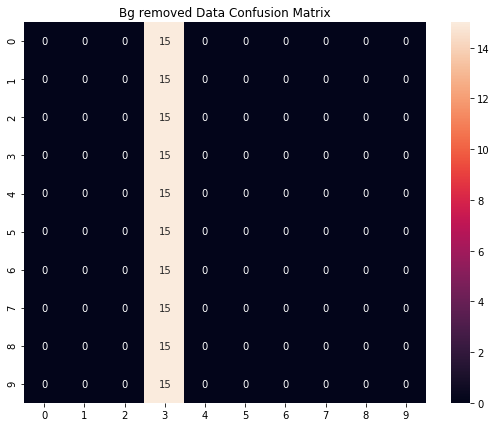

In [19]:
def predict(model, img):
    img = Image.open(img)
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return np.argmax(preds[0])

zeros= glob('HandSignClassification/Images/bg_removed/rgb_0/*.jpg')
ones = glob('HandSignClassification/Images/bg_removed/rgb_1/*.jpg')
twos= glob('HandSignClassification/Images/bg_removed/rgb_2/*.jpg')
threes= glob('HandSignClassification/Images/bg_removed/rgb_3/*.jpg')
fours = glob('HandSignClassification/Images/bg_removed/rgb_4/*.jpg')
fives = glob('HandSignClassification/Images/bg_removed/rgb_5/*.jpg')
sixes = glob('HandSignClassification/Images/bg_removed/rgb_6/*.jpg')
sevens = glob('HandSignClassification/Images/bg_removed/rgb_7/*.jpg')
eights = glob('HandSignClassification/Images/bg_removed/rgb_8/*.jpg')
nines = glob('HandSignClassification/Images/bg_removed/rgb_9/*.jpg')


my_pred = []
model = load_model(MODEL_FILE)

train_folders = [zeros, ones, twos, threes, fours
                 , fives, sixes, sevens, eights, nines]

samples = 15

for folder in train_folders:
  for temp_img in folder:
    my_pred.append(predict(model, temp_img))
print(my_pred)


my_true_values = []
for i in range(0, 10):
  for j in range(samples):
    my_true_values.append(i)

cm = confusion_matrix(my_true_values, my_pred)
plt.figure(figsize=(9, 7))
plt.title("Bg removed Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

[3, 3, 3, 6, 3, 6, 0, 3, 3, 3, 2, 0, 3, 3, 6, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 5, 5, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 9, 2, 3, 3, 3, 2, 9, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


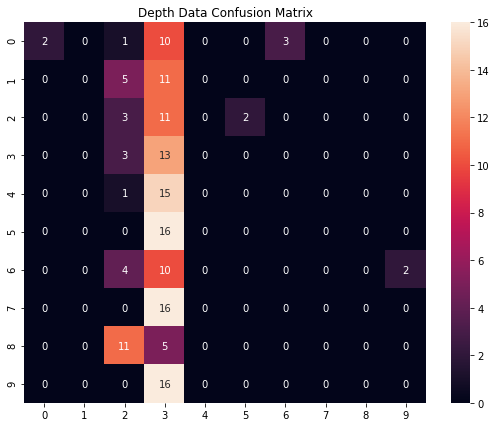

In [20]:
def predict(model, img):
    img = Image.open(img)
    x = np.array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    return np.argmax(preds[0])

zeros= glob('HandSignClassification/Images/depth/train/depth_0/*.jpg')
ones = glob('HandSignClassification/Images/depth/train/depth_1/*.jpg')
twos= glob('HandSignClassification/Images/depth/train/depth_2/*.jpg')
threes= glob('HandSignClassification/Images/depth/train/depth_3/*.jpg')
fours = glob('HandSignClassification/Images/depth/train/depth_4/*.jpg')
fives = glob('HandSignClassification/Images/depth/train/depth_5/*.jpg')
sixes = glob('HandSignClassification/Images/depth/train/depth_6/*.jpg')
sevens = glob('HandSignClassification/Images/depth/train/depth_7/*.jpg')
eights = glob('HandSignClassification/Images/depth/train/depth_8/*.jpg')
nines = glob('HandSignClassification/Images/depth/train/depth_9/*.jpg')


my_pred = []
model = load_model(MODEL_FILE)

train_folders = [zeros, ones, twos, threes, fours
                 , fives, sixes, sevens, eights, nines]

samples = 16

for folder in train_folders:
  for temp_img in folder:
    my_pred.append(predict(model, temp_img))
print(my_pred)


my_true_values = []
for i in range(0, 10):
  for j in range(samples):
    my_true_values.append(i)

cm = confusion_matrix(my_true_values, my_pred)
plt.figure(figsize=(9, 7))
plt.title("Depth Data Confusion Matrix")
sns.heatmap(cm, annot=True, annot_kws={"size": 10})